In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim

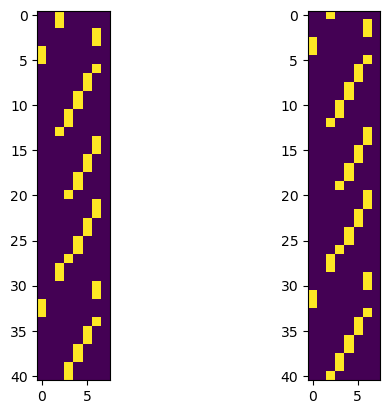

In [69]:

songStrings = numpy.array([
    "CCGGAAGFFEEDDCGGFFEEDGGFFEEDCCGGAAGFFEEDDC",
    "ABCDEFABCDEFABCDEFABCDEFABCDEFABCDEFABCDEF",
    "ABACADAEAFABEFADECBABCFEDEFABCADEBACADFABE",
    "DBCACBCFFDCEFFEFCDDEFEBEACFECBBBCBECBFDAFB",
    "ABEBCAEFCDFFBCBDBBBCEDCBFBFFECBCEBCAAFFADB",
    "BEEFBAFDAEAAEFDBDFDEFCACEBCCDACEACACEEDBAA",
    "BFEBFEEBDBCFEAACAAAFDFCBFBFEAACFFCAABCEDDC",
    "BADDFFEADBEDFDFBEBCCADEFDEABBFDEFFEBEEFDEF",
    "ABFFEDBDBFECEDEAEBBEECFDDAEDCDBBFCADADBBCF",
    "DFBCEBDAADAAFCDACADDAFFACDCFCCDDDCFBEBBDED",
    "CCFBEFDDCBFDADDBFBCCEEABAFAAAEDCDCEAEFBFCD",
    "EBADFFAAFADDDABEABBDFDCAFBCDEEBBBECDDFEEAE",
    "AFADDFEFADDBCDCFEEFCAEEEDFFEDBCADBBDBAEFCD"])

notes=list("ABCDEFGH")


def generateIOData(songNr,songStrings=songStrings):
    I=numpy.zeros((41,8))
    O=numpy.zeros((41,8))
    for i in range(41):
        I[i][notes.index(songStrings[songNr][i])]=1.0
        O[i][notes.index(songStrings[songNr][i+1])]=1.0
    return I,O

I,O=generateIOData(0,songStrings)
subplot(1,2,1)
imshow(I)
subplot(1,2,2)
imshow(O)

In [70]:
I

array([[0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 

In [65]:
class SimpleRNNModel(nn.Module):
    def __init__(self):
        super(SimpleRNNModel, self).__init__()
        self.expansion_layer = nn.Linear(in_features=8, out_features=20)
        self.rnn_layer = nn.GRU(input_size=20, hidden_size=20, batch_first=True)
        self.output_layer = nn.Linear(in_features=20, out_features=8)

    def forward(self, x):
        x = torch.relu(self.expansion_layer(x))
        x, _ = self.rnn_layer(x)
        x = torch.sigmoid(self.output_layer(x))
        return x
model=SimpleRNNModel()
output=model(torch.Tensor(I))
output.shape

torch.Size([41, 8])

In [68]:
model = SimpleRNNModel()

songs =  list(range(10))

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

num_epochs = 1000  # Number of times to iterate over the entire dataset

for epoch in range(num_epochs):
    # Shuffle songs for each epoch
    numpy.random.shuffle(songs)
    acc=numpy.zeros((10))
    for song in songs:
        # Generate input-output data for the current song
        I, O = generateIOData(song)
        
        # Convert data to tensors if not already
        inputs = torch.tensor([I], dtype=torch.float)
        targets = torch.tensor([O], dtype=torch.float) # Assuming O is one-hot encoded and targets are needed for CrossEntropyLoss
        
        # Forward pass
        outputs = model(inputs)
        
        # Calculate loss
        loss = criterion(outputs, targets)  # Reshape to match [batch_size*sequence_length, num_classes]
        
        # Zero gradients, perform a backward pass, and update the weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        acc[song]=loss.item()
    if epoch%10==0: 
        print(f'Epoch {epoch+1}, Loss: {mean(acc)}, Losses: {numpy.round(acc,2)}')

Epoch 1, Loss: 0.24474659264087678, Losses: [0.24 0.25 0.24 0.25 0.24 0.24 0.25 0.25 0.25 0.25]
Epoch 11, Loss: 0.10955046713352204, Losses: [0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11]
Epoch 21, Loss: 0.10687164440751076, Losses: [0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11]
Epoch 31, Loss: 0.10612448677420616, Losses: [0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.1  0.11 0.11]
Epoch 41, Loss: 0.1057235062122345, Losses: [0.11 0.1  0.11 0.11 0.1  0.11 0.11 0.1  0.1  0.11]
Epoch 51, Loss: 0.1054599329829216, Losses: [0.11 0.1  0.1  0.1  0.1  0.11 0.1  0.1  0.1  0.11]
Epoch 61, Loss: 0.1052810326218605, Losses: [0.11 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.11]
Epoch 71, Loss: 0.10512214079499245, Losses: [0.11 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.11]
Epoch 81, Loss: 0.10495381578803062, Losses: [0.11 0.1  0.1  0.1  0.1  0.11 0.1  0.1  0.1  0.11]
Epoch 91, Loss: 0.10469958409667016, Losses: [0.11 0.1  0.1  0.1  0.1  0.11 0.1  0.1  0.1  0.11]
Epoch 101, Loss: 0.104398155957460

Epoch 841, Loss: 0.058772499579936265, Losses: [0.04 0.01 0.05 0.07 0.06 0.08 0.06 0.05 0.09 0.07]
Epoch 851, Loss: 0.058992691617459056, Losses: [0.04 0.01 0.05 0.07 0.06 0.08 0.06 0.05 0.09 0.07]
Epoch 861, Loss: 0.05832208413630724, Losses: [0.04 0.01 0.05 0.07 0.06 0.08 0.06 0.05 0.09 0.07]
Epoch 871, Loss: 0.058743799850344655, Losses: [0.04 0.01 0.05 0.08 0.06 0.08 0.06 0.05 0.09 0.07]
Epoch 881, Loss: 0.057897732220590116, Losses: [0.04 0.01 0.05 0.07 0.06 0.08 0.06 0.05 0.09 0.07]
Epoch 891, Loss: 0.0577035709284246, Losses: [0.04 0.01 0.05 0.07 0.06 0.08 0.06 0.05 0.09 0.07]
Epoch 901, Loss: 0.06097639678046107, Losses: [0.04 0.01 0.06 0.08 0.06 0.08 0.06 0.06 0.09 0.08]
Epoch 911, Loss: 0.05745679521933198, Losses: [0.04 0.01 0.05 0.07 0.06 0.07 0.06 0.05 0.08 0.07]
Epoch 921, Loss: 0.056969395745545624, Losses: [0.04 0.01 0.05 0.07 0.06 0.07 0.06 0.05 0.08 0.07]
Epoch 931, Loss: 0.05934573952108622, Losses: [0.04 0.01 0.05 0.07 0.06 0.07 0.06 0.06 0.09 0.08]
Epoch 941, Loss:

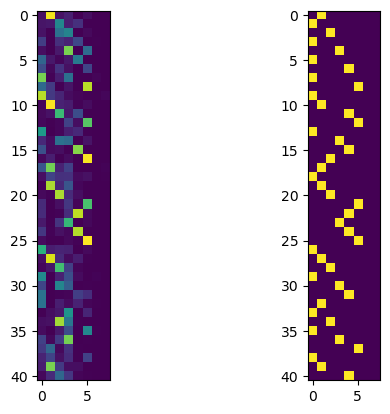

In [67]:
subplot(1,2,1)
imshow(outputs.detach().numpy()[0])
subplot(1,2,2)
imshow(targets[0])

In [51]:
outputs

tensor([[[6.2933e-02, 8.4348e-01, 2.4340e-02, 6.7004e-04, 6.7271e-02,
          3.3749e-02, 1.5372e-01, 3.6649e-02],
         [5.5829e-03, 2.0019e-02, 9.6167e-01, 1.5576e-02, 4.8777e-03,
          1.8232e-02, 4.1632e-02, 1.6342e-02],
         [3.6625e-02, 6.2356e-04, 1.1142e-02, 9.2309e-01, 1.6710e-02,
          7.8689e-03, 8.3584e-02, 3.6198e-03],
         [2.6538e-03, 3.6964e-02, 7.7927e-03, 3.6237e-02, 9.4119e-01,
          4.9598e-02, 1.2687e-02, 1.1308e-02],
         [1.7936e-02, 2.7198e-02, 1.8638e-02, 3.1620e-02, 2.1931e-02,
          9.2525e-01, 6.8082e-03, 1.3973e-02],
         [9.6984e-01, 4.7989e-02, 3.7386e-03, 4.3506e-02, 8.7859e-03,
          2.6663e-02, 2.8280e-02, 1.6428e-02],
         [5.8935e-02, 9.1907e-01, 2.9881e-02, 6.1778e-05, 5.8253e-02,
          1.3496e-02, 4.1035e-02, 2.0352e-02],
         [3.9281e-03, 1.9236e-02, 9.5525e-01, 2.0004e-02, 1.1086e-02,
          9.6329e-03, 3.3709e-02, 1.5818e-02],
         [2.9192e-02, 5.9306e-04, 1.1793e-02, 9.1970e-01, 1.9825

In [45]:
targets

tensor([[[0., 1., 0., 0., 0., 0., 0., 0.],
         [0., 0., 1., 0., 0., 0., 0., 0.],
         [0., 0., 0., 1., 0., 0., 0., 0.],
         [0., 0., 0., 0., 1., 0., 0., 0.],
         [0., 0., 0., 0., 0., 1., 0., 0.],
         [1., 0., 0., 0., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0., 0., 0.],
         [0., 0., 1., 0., 0., 0., 0., 0.],
         [0., 0., 0., 1., 0., 0., 0., 0.],
         [0., 0., 0., 0., 1., 0., 0., 0.],
         [0., 0., 0., 0., 0., 1., 0., 0.],
         [1., 0., 0., 0., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0., 0., 0.],
         [0., 0., 1., 0., 0., 0., 0., 0.],
         [0., 0., 0., 1., 0., 0., 0., 0.],
         [0., 0., 0., 0., 1., 0., 0., 0.],
         [0., 0., 0., 0., 0., 1., 0., 0.],
         [1., 0., 0., 0., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0., 0., 0.],
         [0., 0., 1., 0., 0., 0., 0., 0.],
         [0., 0., 0., 1., 0., 0., 0., 0.],
         [0., 0., 0., 0., 1., 0., 0., 0.],
         [0., 0., 0., 0., 0., 1., 0., 0.],
         [1

In [20]:
outputs.view(-1, 8)

tensor([[ 6.5679e-01,  2.4307e-01, -7.2380e-01,  6.3043e-01,  1.2702e-01,
          7.0828e-02,  1.8839e-01, -7.5215e-01],
        [ 3.1341e-01, -1.8593e-01, -1.0538e+00,  1.1308e+00,  2.1663e-01,
         -7.2294e-01,  9.0816e-01,  2.8526e-01],
        [-3.1880e-01, -2.3479e-01, -2.5365e-01,  8.6134e-02, -8.2675e-01,
          4.4834e-01,  2.4902e+00,  3.7885e-01],
        [ 6.6286e-01, -2.2794e-01, -2.4063e-01, -5.0145e-01, -2.1216e+00,
          1.2792e+00,  1.9143e+00, -2.8365e-01],
        [ 1.3765e+00,  5.4545e-01, -6.0843e-01, -6.0215e-01, -1.3420e+00,
          2.6744e-01,  1.1796e+00,  1.2642e-01],
        [ 8.7290e-01,  1.0165e+00, -9.1797e-02, -1.0536e+00,  4.1293e-01,
         -4.9574e-01,  9.2834e-01, -5.4160e-02],
        [ 1.7147e-01, -5.8072e-01, -3.3497e-01, -3.0923e-01, -6.4508e-01,
          2.4471e+00,  3.7834e-01, -1.6770e+00],
        [ 6.6204e-01, -5.2585e-01, -6.9489e-01,  5.2942e-01, -9.2505e-01,
          2.0351e+00, -1.2939e+00, -2.0448e+00],
        [ 3.8879